In [7]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Load the data from the Excel file
data = pd.read_excel('../Resource/ExperimentDataBase/CV_Data_5_Cor.xlsx')
data.head()

,TCART,CIrededge２,DVI,OSAVI,MTVI,CV
0,0.209295,0.302903,0.200040,0.475878,0.074236,0.5827
1,0.084067,0.104513,0.080682,0.304724,0.032676,0.3358
2,0.153540,0.212718,0.146928,0.418618,0.056766,0.6749
3,0.249560,0.410743,0.237352,0.504890,0.085574,0.6258
4,0.251764,0.415978,0.239668,0.507217,0.086328,0.7649


In [11]:
# Split the data into features (X) and target (y)
# X = data.drop([[]], axis=1)
X = data.drop(['CV'],axis=1)
y = data['CV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("X_Train:",X_train)
print("X_Test:",X_test)

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform both the training and testing data
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

X_Train:        TCART  CIrededge２       DVI     OSAVI      MTVI
30  0.189508    0.276293  0.184066  0.465006  0.069231
31  0.123578    0.427714  0.303125  0.612845  0.101796
43 -0.022183    0.026744  0.008742  0.042960  0.006276
65  0.123938    0.162472  0.117793  0.375754  0.046553
46  0.187283    0.273595  0.177971  0.453515  0.067189
24  0.329515    0.651374  0.316002  0.553949  0.107199
17  0.122658    0.152739  0.115964  0.371831  0.045884
56  0.148443    0.189958  0.143716  0.442439  0.059111
35  0.104961    0.167508  0.110544  0.337352  0.040572
18  0.168053    0.236878  0.159702  0.434035  0.061221
39  0.172009    0.418090  0.294098  0.581302  0.095094
55  0.136835    0.182467  0.129224  0.392362  0.050650
33  0.278018    0.425811  0.225739  0.489541  0.090070
45  0.203544    0.305823  0.192976  0.467722  0.072021
0   0.209295    0.302903  0.200040  0.475878  0.074236
14  0.239615    0.770297  0.346279  0.591146  0.113686
36  0.321130    0.556486  0.287847  0.537628  0.107857
5

StandardScaler()

C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23276\202614004.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train, hist=True, kde=False, label='Train Data')
C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_23276\202614004.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test, hist=True

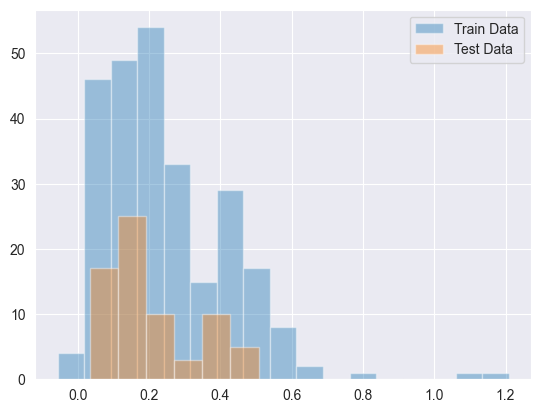

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 绘制直方图
sns.distplot(X_train, hist=True, kde=False, label='Train Data')
sns.distplot(X_test, hist=True, kde=False, label='Test Data')

plt.legend()
plt.show()

其中 $\xi$ 是介于 $x$ 和 $2$ 之间的某个数，根据拉格朗日中值定理，有：

In [13]:
# Define the XGBoost model
model = xgb.XGBRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_P_train = model.predict(X_train)
y_pred = model.predict(X_test)


R²: 0.9999241980702231


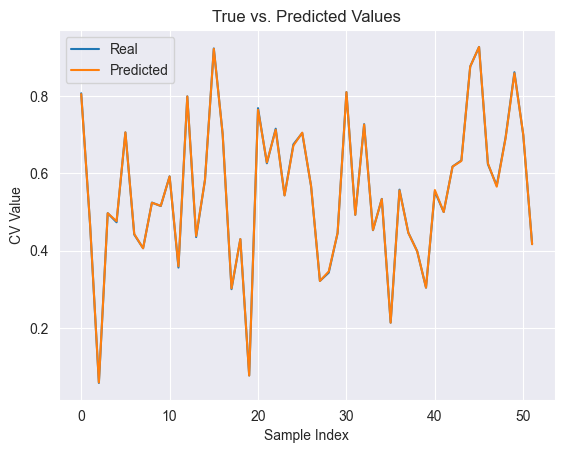

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Plot the true values and predicted values
plt.plot(y_train.values,label="Real")
plt.plot(y_P_train, label='Predicted')
plt.title('True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('CV Value')
r2 = r2_score(y_train,y_P_train)
print("R²:",r2)
plt.legend()
plt.show()

R²: -0.5593641944354342


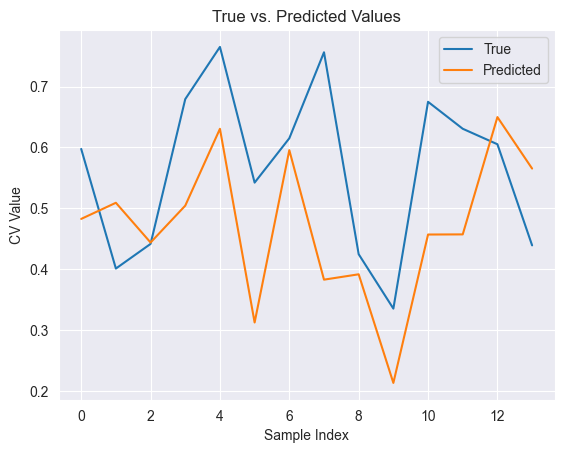

In [15]:


import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Plot the true values and predicted values
plt.plot(y_test.values, label='True')
plt.plot(y_pred, label='Predicted')
plt.title('True vs. Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('CV Value')
r2 = r2_score(y_test,y_pred)
print("R²:",r2)
plt.legend()
plt.show()